In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("../data/raw/dados_brasileirao_normalizados.csv");

In [204]:
# 1. Pré-processamento

df['dif_chutes'] = df['chutes_1'] - df['chutes_2']
df['dif_chutes_no_alvo'] = df['chutes_no_alvo_1'] - df['chutes_no_alvo_2']
df['dif_posse_de_bola'] = df['posse_de_bola_1'] - df['posse_de_bola_2']
df['dif_passes'] = df['passes_1'] - df['passes_2']
df['dif_precisao_de_passes'] = df['precisao_passes_1'] - df['precisao_passes_2']
df['dif_cartao_amarelo'] = df['cartao_amarelo_1'] - df['cartao_amarelo_2']
df['dif_cartao_vermelho'] = df['cartao_vermelho_1'] - df['cartao_vermelho_2']
df['dif_impedimentos'] = df['impedimentos_1'] - df['impedimentos_2']
df['dif_faltas'] = df['faltas_1'] - df['faltas_2']
df['dif_escanteios'] = df['escanteios_1'] - df['escanteios_2']
df['num_cartoes_1'] = df['cartao_amarelo_1'] + df['cartao_vermelho_1']
df['num_cartoes_2'] = df['cartao_amarelo_2'] + df['cartao_vermelho_2']
df['dif_cartoes'] = df['num_cartoes_1'] + df['num_cartoes_2']

"""df.drop(columns=['chutes_1','chutes_2','chutes_no_alvo_1','chutes_no_alvo_2','posse_de_bola_1','posse_de_bola_2',
                 'passes_1','passes_2','precisao_passes_1','precisao_passes_2','cartao_amarelo_1','cartao_amarelo_2',
                 'cartao_vermelho_1','cartao_vermelho_2','impedimentos_1','impedimentos_2','escanteios_1','escanteios_2',
                 'num_cartoes_1','num_cartoes_2','faltas_1', 'faltas_2'], inplace=True)"""
display(df)
"""corr = df.corr()
print(corr['resultado'].sort_values(ascending=False))"""

X = df.drop(columns=['resultado'])
y = df['resultado']

,chutes_1,chutes_2,chutes_no_alvo_1,chutes_no_alvo_2,posse_de_bola_1,posse_de_bola_2,passes_1,passes_2,precisao_passes_1,precisao_passes_2,...,dif_passes,dif_precisao_de_passes,dif_cartao_amarelo,dif_cartao_vermelho,dif_impedimentos,dif_faltas,dif_escanteios,num_cartoes_1,num_cartoes_2,dif_cartoes
0,9,15,0,0,0.65,0.35,509,280,0.803426,0.805248,...,229,-0.001822,-3,0,1,-6,-3,1,4,5
1,10,10,0,0,0.56,0.44,471,384,0.803426,0.805248,...,87,-0.001822,-1,0,0,-1,1,3,4,7
2,9,5,0,0,0.43,0.57,360,481,0.803426,0.805248,...,-121,-0.001822,4,0,-2,4,9,5,1,6
3,15,14,0,0,0.42,0.58,357,477,0.803426,0.805248,...,-120,-0.001822,-2,0,-1,6,5,2,4,6
4,16,15,0,0,0.48,0.52,363,383,0.803426,0.805248,...,-20,-0.001822,0,0,-3,-2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,7,15,5,6,0.64,0.36,550,318,0.840000,0.750000,...,232,0.090000,0,0,1,-6,2,2,2,4
3406,17,14,3,6,0.57,0.43,506,400,0.870000,0.850000,...,106,0.020000,1,-1,-1,6,4,3,3,6
3407,14,15,7,6,0.45,0.55,295,353,0.700000,0.770000,...,-58,-0.070000,1,0,-2,-6,-4,3,2,5
3408,9,10,3,2,0.42,0.58,406,535,0.840000,0.890000,...,-129,-0.050000,-3,0,2,-3,-5,0,3,3


In [205]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled)
print(y_resampled)

      chutes_1  chutes_2  chutes_no_alvo_1  chutes_no_alvo_2  posse_de_bola_1  \
0            9        15                 0                 0         0.650000   
1           10        10                 0                 0         0.560000   
2            9         5                 0                 0         0.430000   
3           15        14                 0                 0         0.420000   
4           16        15                 0                 0         0.480000   
...        ...       ...               ...               ...              ...   
4942        18        12                 6                 3         0.582227   
4943        11         9                 3                 8         0.530000   
4944        15        12                 6                 5         0.466250   
4945         7        10                 2                 3         0.664153   
4946        19        13                 4                 5         0.723088   

      posse_de_bola_2  pass

In [206]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 2. Treinamento do modelo

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

"""param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)"""

# Exemplo de rótulos
"""classes, counts = np.unique(y, return_counts=True)
total_samples = len(y)

# Calcular os pesos
weights = total_samples / counts
weights_dict = {cls: weight for cls, weight in zip(classes, weights)}
sample_weights = y_train.map(weights_dict)"""

best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.7}

model = XGBClassifier(**best_params)

# Criar os estimadores
xgb_model = XGBClassifier(**best_params)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Criar o VotingClassifier
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lr', lr_model)
    ],
    voting='soft',
    weights=[3, 1, 1]  # ou 'soft' para probabilidades ponderadas
)

ensemble.fit(X_train, y_train)

# 3. Predição
y_pred = ensemble.predict(X_test)

c:\Users\Thiago Yure\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.67

Relatório de Classificação:
              precision    recall  f1-score   support

      Empate       0.68      0.67      0.68       331
    Mandante       0.62      0.65      0.63       342
   Visitante       0.71      0.68      0.69       317

    accuracy                           0.67       990
   macro avg       0.67      0.67      0.67       990
weighted avg       0.67      0.67      0.67       990



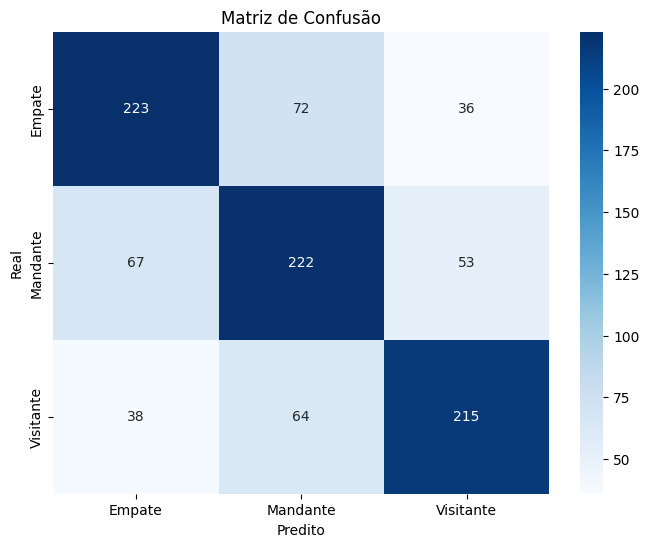

In [207]:
# 4. Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório detalhado
print("\nRelatório de Classificação:")
target_names = ['Empate', 'Mandante', 'Visitante']
print(classification_report(y_test, y_pred, target_names=target_names))

# 5. Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()